In [37]:
import torch 
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from API_utils.dataset_api import API_Class

In [38]:
DATASET_PATH = "Z:/mlpcnnsemi/dataset/train_Dataset.csv"
TEST_DATASET_PATH = "Z:/mlpcnnsemi/dataset/test_Dataset.csv"
SAVE_MODEL_PATH = "Z:/mlpcnnsemi/model/mlp/82"
DEVICE= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCH = 100
lr=0.0001
BATCHSIZE=20

In [39]:
train_data = API_Class(DATASET_PATH)
test_data = API_Class(TEST_DATASET_PATH)

In [43]:
#csx single input
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, lrate = 0.0001, loss_fn = nn.CrossEntropyLoss()):
        super(MLP, self).__init__()

        self.fc1 = nn.Sequential(nn.Linear(640,320),
                                    nn.ReLU()
        )
        self.fc2 = nn.Sequential(nn.Linear(320,160),
                                    nn.ReLU()
        )
        self.fc3 = nn.Sequential(nn.Linear(160,40),
                                    nn.ReLU()
        )
        self.fc4 = nn.Sequential(nn.Linear(40,2),
                                    nn.ReLU()
        )        
        # self.ln1 = torch.nn.Linear(640,160)
        # self.ln2 = torch.nn.Linear(160,40)
        # self.ln3 = torch.nn.Linear(40,10)
        # self.ln4 = torch.nn.Linear(10,2)
        # self.ln5 = torch.nn.Linear(2,1)

        
        
        self.loss_fn = loss_fn
        self.lrate=lrate        
        self.optimizer=optim.SGD(self.parameters(),self.lrate,momentum=0.9)
    def forward(self, x):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_size) Tensor
        @return y: an (N, out_size) Tensor of output from the network
        """
        '''
        extractor for protein 
        '''
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        


        x = torch.squeeze(x,dim=0)
        return x



In [44]:
# mlp
train_data_loader = DataLoader(train_data,batch_size=BATCHSIZE,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=BATCHSIZE,shuffle=True)
Net = MLP().to(DEVICE)
optimizer = optim.Adam(params=Net.parameters(),lr=lr)
loss_fn = nn.CrossEntropyLoss()

In [45]:
#single input
def evaluate(model_path,test_data_loader,device=DEVICE):
    # count=0
    # acc = 0
    tp=0
    tn=0
    fp=0
    fn=0
    model = torch.load(model_path)
    for idx, data in enumerate(test_data_loader):
        api_input, api_label = data
        # count+=1
        # rna_input = api_input[:,1:341]
        # protein_input = api_input[:,341:641]
        # rna_input = torch.unsqueeze(rna_input,dim=0)
        # protein_input = torch.unsqueeze(protein_input,dim=0)
        # #api_label = torch.unsqueeze(api_label,dim=0)
        # rna_input = rna_input.to(dtype=torch.float32).to(DEVICE)
        # protein_input = protein_input.to(dtype=torch.float32).to(DEVICE)

        api_input = torch.unsqueeze(api_input,dim=0)
        api_input = api_input.to(dtype=torch.float32).to(DEVICE)
        output = model(api_input).to(DEVICE)
        # print(output.shape[0])
        for i in range(output.shape[0]):
            if(torch.argmax(output[i])==api_label[i] and api_label[i]==0):
                tn+=1
            elif(torch.argmax(output[i])==api_label[i] and api_label[i]==1):
                tp+=1
            elif(torch.argmax(output[i])!=api_label[i] and api_label[i]==1):   
                fn+=1
            elif(torch.argmax(output[i])!=api_label[i] and api_label[i]==0):
                fp+=1       

    Accuracy=(tp+tn+2)/(tp+tn+fn+fp+4)
    P = (tp+1)/ (tp+fp+2)
    R = (tp+1)/ (tp+fn+2)
    print(Accuracy)
    return Accuracy,P,R

100%|██████████| 137/137 [00:00<00:00, 301.90it/s]


0.75
0.7485380116959064


100%|██████████| 137/137 [00:00<00:00, 333.41it/s]


0.751099706744868
0.75


100%|██████████| 137/137 [00:00<00:00, 331.79it/s]


0.751099706744868
0.75


100%|██████████| 137/137 [00:00<00:00, 355.87it/s]


0.751099706744868
0.75


100%|██████████| 137/137 [00:00<00:00, 327.06it/s]


0.7620967741935484
0.7690058479532164


100%|██████████| 137/137 [00:00<00:00, 324.74it/s]


0.7723607038123167
0.7792397660818714


100%|██████████| 137/137 [00:00<00:00, 333.41it/s]


0.782258064516129
0.7865497076023392


100%|██████████| 137/137 [00:00<00:00, 333.41it/s]


0.7972873900293255
0.8026315789473685


100%|██████████| 137/137 [00:00<00:00, 329.42it/s]


0.8101173020527859
0.8157894736842105


100%|██████████| 137/137 [00:00<00:00, 341.71it/s]


0.8229472140762464
0.8391812865497076


100%|██████████| 137/137 [00:00<00:00, 269.87it/s]


0.8262463343108505
0.8289473684210527


100%|██████████| 137/137 [00:00<00:00, 265.69it/s]


0.8313782991202346
0.8245614035087719


100%|██████████| 137/137 [00:00<00:00, 269.87it/s]


0.844208211143695
0.8581871345029239


100%|██████████| 137/137 [00:00<00:00, 253.44it/s]


0.8372434017595308
0.827485380116959


100%|██████████| 137/137 [00:00<00:00, 247.51it/s]


0.8618035190615836
0.8669590643274854


100%|██████████| 137/137 [00:00<00:00, 256.28it/s]


0.8680351906158358
0.868421052631579


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.875
0.8757309941520468


100%|██████████| 137/137 [00:00<00:00, 252.98it/s]


0.8834310850439883
0.8830409356725146


100%|██████████| 137/137 [00:00<00:00, 249.30it/s]


0.8892961876832844
0.8859649122807017


100%|██████████| 137/137 [00:00<00:00, 249.76it/s]


0.8867302052785924
0.8801169590643275


100%|██████████| 137/137 [00:00<00:00, 252.05it/s]


0.8826979472140762
0.8771929824561403


100%|██████████| 137/137 [00:00<00:00, 263.15it/s]


0.9006598240469208
0.8903508771929824


100%|██████████| 137/137 [00:00<00:00, 252.05it/s]


0.908724340175953
0.902046783625731


100%|██████████| 137/137 [00:00<00:00, 264.67it/s]


0.905425219941349
0.8918128654970761


100%|██████████| 137/137 [00:00<00:00, 255.80it/s]


0.9090909090909091
0.8874269005847953


100%|██████████| 137/137 [00:00<00:00, 249.30it/s]


0.9182551319648093
0.9064327485380117


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.9270527859237536
0.9035087719298246


100%|██████████| 137/137 [00:00<00:00, 256.76it/s]


0.9277859237536656
0.9035087719298246


100%|██████████| 137/137 [00:00<00:00, 246.18it/s]


0.9321847507331378
0.9064327485380117


100%|██████████| 137/137 [00:00<00:00, 236.02it/s]


0.9362170087976539
0.9137426900584795


100%|██████████| 137/137 [00:00<00:00, 241.41it/s]


0.9464809384164223
0.9122807017543859


100%|██████████| 137/137 [00:00<00:00, 251.59it/s]


0.9464809384164223
0.9093567251461988


100%|██████████| 137/137 [00:00<00:00, 264.17it/s]


0.9530791788856305
0.922514619883041


100%|██████████| 137/137 [00:00<00:00, 252.98it/s]


0.9545454545454546
0.9122807017543859


100%|██████████| 137/137 [00:00<00:00, 254.38it/s]


0.9494134897360704
0.9122807017543859


100%|██████████| 137/137 [00:00<00:00, 243.12it/s]


0.9600439882697948
0.922514619883041


100%|██████████| 137/137 [00:00<00:00, 245.74it/s]


0.9607771260997068
0.9195906432748538


100%|██████████| 137/137 [00:00<00:00, 260.16it/s]


0.9519794721407625
0.9152046783625731


100%|██████████| 137/137 [00:00<00:00, 253.44it/s]


0.9699413489736071
0.9254385964912281


100%|██████████| 137/137 [00:00<00:00, 252.05it/s]


0.9659090909090909
0.9137426900584795


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.9728739002932552
0.9269005847953217


100%|██████████| 137/137 [00:00<00:00, 257.24it/s]


0.9758064516129032
0.9269005847953217


100%|██████████| 137/137 [00:00<00:00, 260.66it/s]


0.9776392961876833
0.9327485380116959


100%|██████████| 137/137 [00:00<00:00, 256.76it/s]


0.9725073313782991
0.9137426900584795


100%|██████████| 137/137 [00:00<00:00, 249.76it/s]


0.9769061583577713
0.9239766081871345


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.9765395894428153
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 262.65it/s]


0.9857038123167156
0.9400584795321637


100%|██████████| 137/137 [00:00<00:00, 264.17it/s]


0.9827712609970675
0.9283625730994152


100%|██████████| 137/137 [00:00<00:00, 266.13it/s]


0.9882697947214076
0.935672514619883


100%|██████████| 137/137 [00:00<00:00, 256.28it/s]


0.9875366568914956
0.9342105263157895


100%|██████████| 137/137 [00:00<00:00, 246.18it/s]


0.9882697947214076
0.9342105263157895


100%|██████████| 137/137 [00:00<00:00, 251.59it/s]


0.9879032258064516
0.9385964912280702


100%|██████████| 137/137 [00:00<00:00, 231.65it/s]


0.9824046920821115
0.9502923976608187


100%|██████████| 137/137 [00:00<00:00, 256.28it/s]


0.9868035190615836
0.9269005847953217


100%|██████████| 137/137 [00:00<00:00, 256.29it/s]


0.9901026392961877
0.935672514619883


100%|██████████| 137/137 [00:00<00:00, 238.48it/s]


0.9901026392961877
0.9415204678362573


100%|██████████| 137/137 [00:00<00:00, 258.21it/s]


0.9827712609970675
0.9371345029239766


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.9897360703812317
0.9385964912280702


100%|██████████| 137/137 [00:00<00:00, 259.18it/s]


0.9904692082111437
0.9473684210526315


100%|██████████| 137/137 [00:00<00:00, 268.87it/s]


0.9912023460410557
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 267.29it/s]


0.9901026392961877
0.9385964912280702


100%|██████████| 137/137 [00:00<00:00, 270.94it/s]


0.9904692082111437
0.9327485380116959


100%|██████████| 137/137 [00:00<00:00, 253.91it/s]


0.9908357771260997
0.9400584795321637


100%|██████████| 137/137 [00:00<00:00, 245.74it/s]


0.9915689149560117
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 268.82it/s]


0.9912023460410557
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 270.94it/s]


0.9919354838709677
0.9444444444444444


100%|██████████| 137/137 [00:00<00:00, 249.76it/s]


0.9915689149560117
0.9400584795321637


100%|██████████| 137/137 [00:00<00:00, 254.32it/s]


0.9912023460410557
0.9342105263157895


100%|██████████| 137/137 [00:00<00:00, 254.38it/s]


0.9923020527859238
0.9444444444444444


100%|██████████| 137/137 [00:00<00:00, 247.06it/s]


0.9919354838709677
0.9371345029239766


100%|██████████| 137/137 [00:00<00:00, 197.37it/s]


0.9923020527859238
0.9415204678362573


100%|██████████| 137/137 [00:00<00:00, 310.78it/s]


0.9912023460410557
0.9415204678362573


100%|██████████| 137/137 [00:00<00:00, 195.12it/s]


0.9915689149560117
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 201.42it/s]


0.9923020527859238
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 273.09it/s]


0.9912023460410557
0.9385964912280702


100%|██████████| 137/137 [00:00<00:00, 192.38it/s]


0.9923020527859238
0.9473684210526315


100%|██████████| 137/137 [00:00<00:00, 323.98it/s]


0.9923020527859238
0.9415204678362573


100%|██████████| 137/137 [00:00<00:00, 191.10it/s]


0.9864369501466276
0.9210526315789473


100%|██████████| 137/137 [00:00<00:00, 198.22it/s]


0.9923020527859238
0.9342105263157895


100%|██████████| 137/137 [00:00<00:00, 345.14it/s]


0.9919354838709677
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 198.79it/s]


0.9915689149560117
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 196.52it/s]


0.9915689149560117
0.935672514619883


100%|██████████| 137/137 [00:00<00:00, 290.41it/s]


0.9915689149560117
0.9473684210526315


100%|██████████| 137/137 [00:00<00:00, 197.65it/s]


0.9919354838709677
0.9342105263157895


100%|██████████| 137/137 [00:00<00:00, 296.05it/s]


0.9901026392961877
0.945906432748538


100%|██████████| 137/137 [00:00<00:00, 198.51it/s]


0.9926686217008798
0.945906432748538


100%|██████████| 137/137 [00:00<00:00, 192.66it/s]


0.9919354838709677
0.9473684210526315


100%|██████████| 137/137 [00:00<00:00, 339.18it/s]


0.9919354838709677
0.9385964912280702


100%|██████████| 137/137 [00:00<00:00, 189.99it/s]


0.9912023460410557
0.9473684210526315


100%|██████████| 137/137 [00:00<00:00, 240.15it/s]


0.9908357771260997
0.945906432748538


100%|██████████| 137/137 [00:00<00:00, 211.02it/s]


0.9904692082111437
0.9502923976608187


100%|██████████| 137/137 [00:00<00:00, 165.60it/s]


0.9930351906158358
0.9444444444444444


100%|██████████| 137/137 [00:00<00:00, 287.38it/s]


0.9923020527859238
0.9502923976608187


100%|██████████| 137/137 [00:00<00:00, 197.65it/s]


0.9923020527859238
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 206.88it/s]


0.9926686217008798
0.9502923976608187


100%|██████████| 137/137 [00:00<00:00, 249.76it/s]


0.9919354838709677
0.9312865497076024


100%|██████████| 137/137 [00:00<00:00, 192.39it/s]


0.9915689149560117
0.9239766081871345


100%|██████████| 137/137 [00:00<00:00, 322.46it/s]


0.9930351906158358
0.9429824561403509


100%|██████████| 137/137 [00:00<00:00, 217.36it/s]


0.9926686217008798
0.9400584795321637


100%|██████████| 137/137 [00:00<00:00, 201.42it/s]


0.9923020527859238
0.9327485380116959


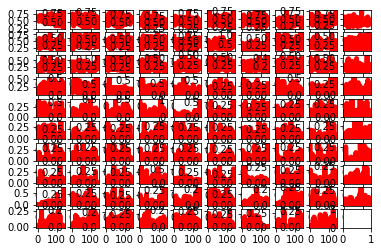

In [46]:
import matplotlib.pyplot as plt
loss_list=[]
a1_list=[]
a2_list=[]
p1_list=[]
p2_list=[]
r1_list=[]
r2_list=[]
for epoch in range(EPOCH):
    x = []#用于存放横坐标
    t_loss = []#用于存放train_loss
    x0=-1
    for data in tqdm(train_data_loader):
        # print(data)
        x0=x0+1
        api_input, api_label = data
        
        # print(api_label)
        # print(api_input)

        api_input = api_input.to(DEVICE)
        api_label = api_label.to(DEVICE).to(dtype=torch.long)
        # rna_input = api_input[:,0:340]
        # protein_input = api_input[:,340:640]
        # rna_input = torch.unsqueeze(rna_input,dim=0)
        # protein_input = torch.unsqueeze(protein_input,dim=0)
        # print(protein_input)
        # api_label = torch.unsqueeze(api_label,dim=0)
        api_input= torch.unsqueeze(api_input,dim=0)
        api_input = api_input.to(dtype=torch.float32)
        # rna_input = rna_input.to(dtype=torch.float32)
        # protein_input = protein_input.to(dtype=torch.float32)
        # output = Net(rna_input,protein_input)
        output = Net(api_input)
        # print(output.shape)
        # print(api_label.shape)
        # print(output)
        # print(api_label)
        optimizer.zero_grad()    
        Loss = loss_fn(output, api_label)  
        x.append(x0)
        
        # t_loss.append(Loss.detach().numpy())   
        t_loss.append(Loss.item())  
        Loss.backward()  

        optimizer.step() 
    train_loss_lines = plt.plot(x, t_loss, 'r', lw=5)
    loss_list.append(t_loss)
    plt.subplot(10,10,epoch+1)
    save_path = SAVE_MODEL_PATH+f'mlp_batch20_Epoch={epoch}_lr={lr}.pth'
    torch.save(Net, save_path)
    a1,p1,r1=evaluate(SAVE_MODEL_PATH+f'mlp_batch20_Epoch={epoch}_lr={lr}.pth',train_data_loader)
    a2,p2,r2=evaluate(SAVE_MODEL_PATH+f'mlp_batch20_Epoch={epoch}_lr={lr}.pth',test_data_loader)
    a1_list.append(a1)
    a2_list.append(a2)
    p1_list.append(p1)
    p2_list.append(p2)
    r1_list.append(r1)
    r2_list.append(r2)
torch.save(Net, SAVE_MODEL_PATH+f'mlp_batch20_Epoch={epoch}_lr={lr}_final.pth')

In [48]:
import numpy as np
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/loss_list.txt',loss_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_acc_list.txt',a1_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_pre_list.txt',p1_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_rec_list.txt',r1_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_acc_list.txt',a2_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_pre_list.txt',p2_list)
np.savetxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_rec_list.txt',r2_list)

In [49]:
c = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_acc_list.txt')
d = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_acc_list.txt')
pp1 = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_pre_list.txt')
pp2 = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_pre_list.txt')
rr1 = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/train_rec_list.txt')
rr2 = np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/test_rec_list.txt')
l=np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch20lr0.0001/loss_list.txt')
print(c.shape)
print(max(c))
print(max(d))
print(max(pp1))
print(max(pp2))
print(max(rr1))
print(max(rr2))

(100,)
0.9930351906158358
0.9502923976608187
0.9953917050691244
0.9928571428571429
0.9926686217008798
0.813953488372093


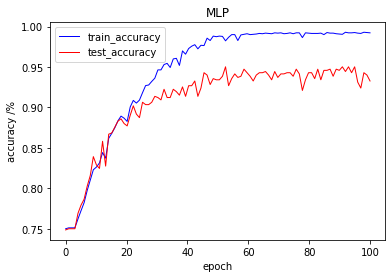

In [50]:
x=np.linspace(0,100,100)

experiment = plt.plot(x, c, 'b', lw=1,label="train_accuracy")
experiment2 = plt.plot(x, d, 'r', lw=1,label="test_accuracy")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("accuracy /%")
plt.title('MLP')
plt.legend(loc=0)

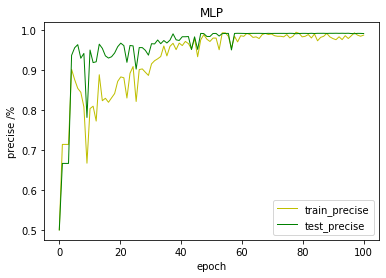

In [51]:
# 
x=np.linspace(0,100,100)

experiment = plt.plot(x, pp1, 'y', lw=1,label="train_precise")
experiment2 = plt.plot(x, pp2, 'g', lw=1,label="test_precise")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("precise /%")
plt.title('MLP')
plt.legend(loc=0)

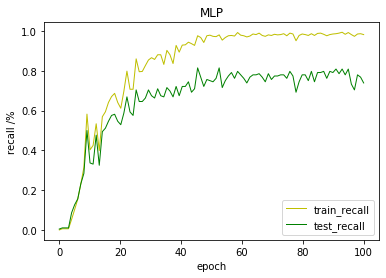

In [52]:
# recall
x=np.linspace(0,100,100)

experiment = plt.plot(x, rr1, 'y', lw=1,label="train_recall")
experiment2 = plt.plot(x, rr2, 'g', lw=1,label="test_recall")
plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("recall /%")
plt.title('MLP')
plt.legend(loc=0)

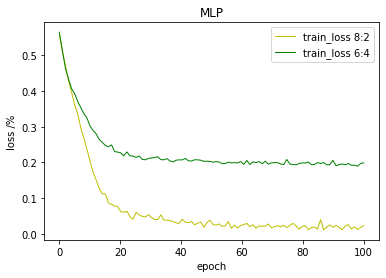

In [56]:
l=np.loadtxt('Z:/mlpcnnsemi/model/mlp/82/mlpbatch1lr0.0001/loss_list.txt')
l2=np.loadtxt('Z:/mlpcnnsemi/model/mlp/64/mlpbatch1lr0.0001/loss_list.txt')
loss_avg=[]
loss_avg2=[]
for i in range(100):
    loss_avg.append(l[i].mean())
    loss_avg2.append(l2[i].mean())
x=np.linspace(0,100,100)

experiment = plt.plot(x, loss_avg, 'y', lw=1,label="train_loss 8:2")
experiment2 = plt.plot(x, loss_avg2, 'g', lw=1,label="train_loss 6:4")

plt.xlabel("epoch") #设置X轴的文字
plt.ylabel("loss /%")
plt.title('MLP')
plt.legend(loc=0)

137


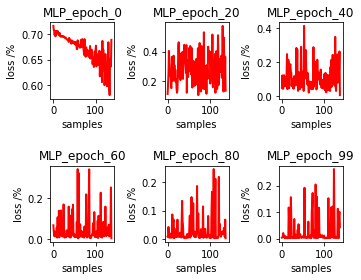

In [53]:
print(l.shape[1])
x=np.linspace(0,l.shape[1],l.shape[1])
plt.figure(figsize=(5, 4))
for i in range (5):
    plt.subplot(2,3,i+1)
    
    experiment = plt.plot(x, l[i*20], 'r', lw=2)

    plt.xlabel("samples") #设置X轴的文字
    plt.ylabel("loss /%")
    plt.title('MLP_'+'epoch_'+str(i*20))

plt.subplot(2,3,6)

experiment = plt.plot(x, l[99], 'r', lw=2)

plt.xlabel("samples") #设置X轴的文字
plt.ylabel("loss /%")
plt.title('MLP_'+'epoch_'+'99')

plt.tight_layout(h_pad=2)
    

In [18]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, lrate = 0.001, loss_fn = nn.CrossEntropyLoss()):
        super(NeuralNet, self).__init__()


        self.conv1 = nn.Sequential(nn.Conv1d(1,8,kernel_size=1),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv2 = nn.Sequential(nn.Conv1d(8,16,kernel_size=1),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )
        self.conv3 = nn.Sequential(nn.Conv1d(1,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.LeakyReLU()
        )
        self.conv4 = nn.Sequential(nn.Conv1d(8,16,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(16),
                                   nn.LeakyReLU()
        )

        self.conv5 = nn.Sequential(nn.Conv1d(16,8,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(8),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )
        self.conv6 = nn.Sequential(nn.Conv1d(8,1,kernel_size=3,stride=2),
                                   nn.BatchNorm1d(1),
                                   nn.MaxPool1d(kernel_size=2),
                                   nn.LeakyReLU()
        )

        self.conv7 = nn.Linear(25,10)
        self.conv8 = nn.Linear(10,2)

        # self.conv1=nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=True)
        # self.batchnorm=nn.BatchNorm1d(num_features=1),
        # self.Relu=nn.ReLU()
        # self.pool=nn.MaxPool1d(kernel_size=3)
        # self.fc1=nn.Linear(64*4*4, 64)
        # self.dropout=nn.Dropout()
        # self.fc2 = nn.Linear(64, 10)

        self.loss_fn = loss_fn
        self.lrate=lrate        
        self.optimizer=optim.SGD(self.parameters(),self.lrate,momentum=0.9)
    def forward(self, rna, protein):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_size) Tensor
        @return y: an (N, out_size) Tensor of output from the network
        """
        '''
        extractor for protein 
        '''
        
        rna = self.conv1(rna)
        rna = self.conv2(rna)

        protein = self.conv3(protein)
        
        protein = self.conv4(protein)

        x = torch.cat((rna,protein),dim=2)
        x = self.conv5(x)
        x = self.conv6(x)
        # print(x.shape)
        x = self.conv7(x)
        x = self.conv8(x)
        x = torch.squeeze(x,dim=0)
        return x